# This program is for Predicting the Employee Monthly Rate

Problem Statement

Perform Regression treating Monthly Rate as Y, and choose prediction error and the best model		
Use SLR, MLR, Ridge Regression, Lasso etc		
RF
AB		
Use Decision Tree 		


# Import Libraries 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
pd.set_option("display.max_columns",100)

# Read training and testing dataset

In [4]:
tr=pd.read_csv("C:/Bhushan data/ETLHIVE (India@123)/Projets submission/09_Project_HR Analytics/HR-Employee-Attrition-Table 1.csv")
tr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# check dataframe profile

In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# check missing data in dataframe - No missing data in input file

# cheking the column profile for repetataion of values

In [6]:
tr.nunique()

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# dropping the discrete column, EmployeeNumber

In [7]:
tr=tr.drop(labels="EmployeeNumber",axis=1)

# creating list pf catagorical and continious columns

all numerical columns are considered Continuous columns

In [8]:
cat = []
con = []
for i in tr.columns:
    if (tr[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
cat,con

(['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'],
 ['Attrition',
  'Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'])

# Check the ouliers in the data

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x1=pd.DataFrame(ss.fit_transform(tr[con]),columns=con)
x1

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.280906,0.446350,0.742527,-1.010909,-0.891688,0.0,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,-0.438422,1.322365,-1.297775,-0.147150,-1.868426,0.0,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,2.280906,0.008343,1.414363,-0.887515,-0.891688,0.0,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.438422,-0.429664,1.461466,-0.764121,1.061787,0.0,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-0.438422,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.438422,-0.101159,0.202082,1.703764,-0.891688,0.0,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,0.0,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,-0.438422,0.227347,-0.469754,-0.393938,-1.868426,0.0,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,-1.584178,0.0,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-0.438422,-1.086676,-1.605183,-0.640727,0.085049,0.0,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,2.346151,-0.658973,0.0,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,-0.438422,1.322365,0.546677,-0.887515,0.085049,0.0,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.426230,1.191438,0.0,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [10]:
out = []
for i in con:
     out=out+list(x1[(x1[i]>3)|(x1[i]<-3)].index)

In [11]:
out=list(np.unique(out))
len(out)

83

# Drop all outliers from the data

In [12]:
tr=tr.drop(index=out,axis=0)

# Reindexing the dataframe after deleting outliers

In [13]:
tr.index=range(0,tr.shape[0],1)

# check the distribution of continuous columns
plot histograms or disturibution plot

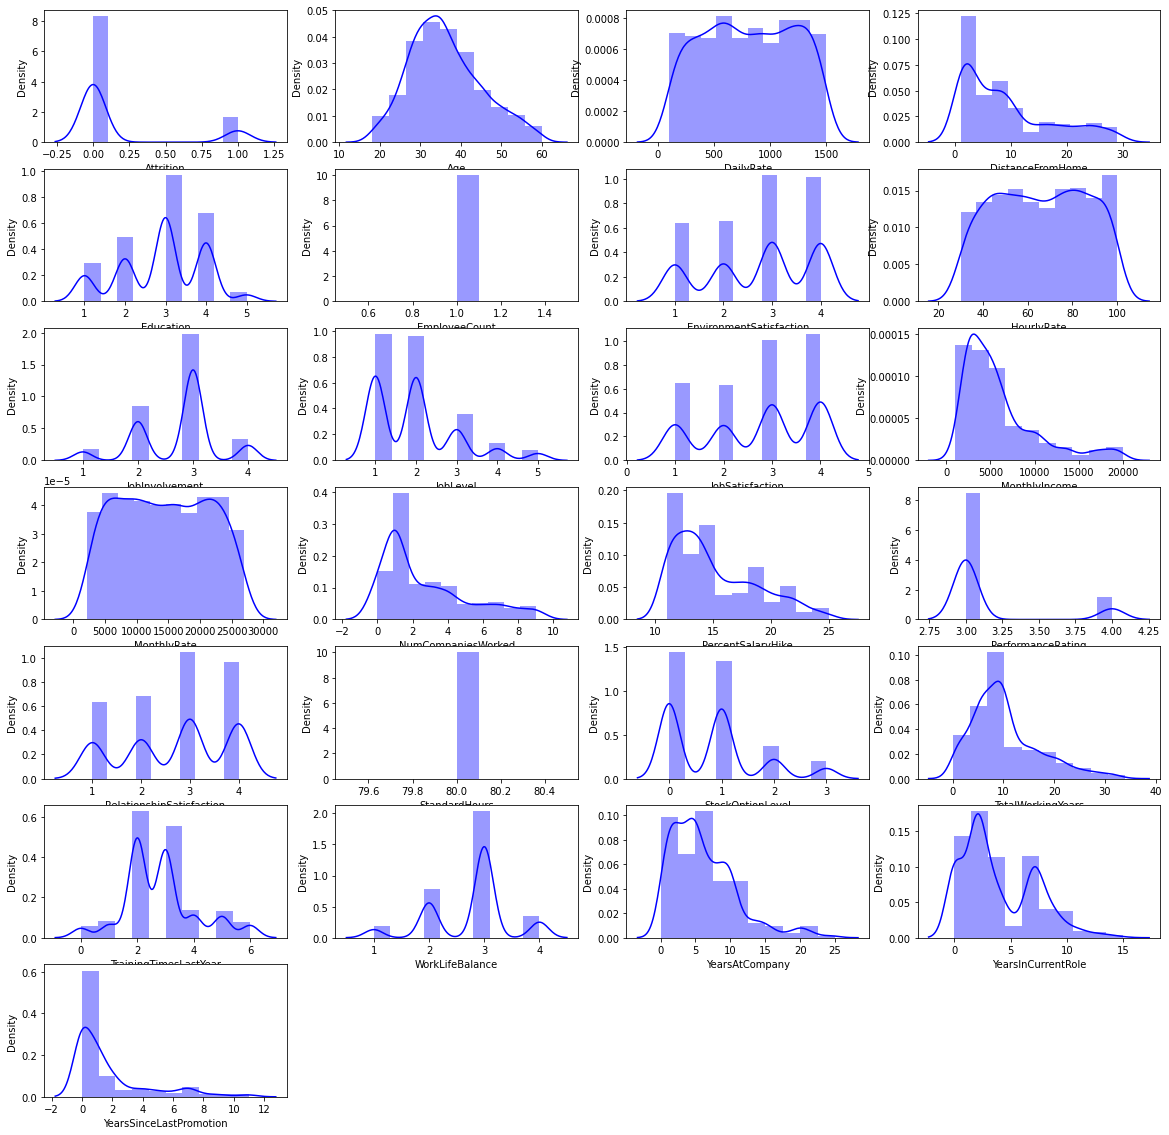

In [14]:
plt.figure(figsize=(20,20))
for i in range(1,26,1):
    plt.subplot(7,4,i)
    sb.distplot(tr[con[i-1]],bins=10,color="blue")


# check the distribution of Catagorical columns
plot histograms or disturibution plot

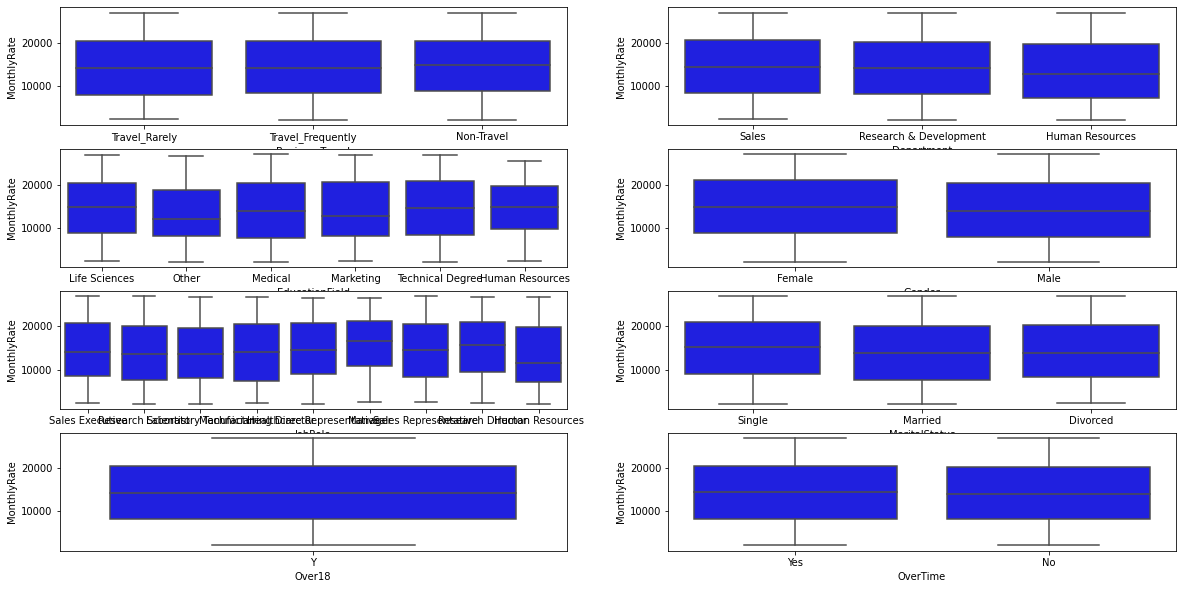

In [15]:
plt.figure(figsize=(20,10))
for i in range(1,9,1):
    plt.subplot(4,2,i)
    sb.boxplot(tr[cat[i-1]],tr["MonthlyRate"],color="blue")

# Check the skewness of all continuous columns

In [16]:
tr[con].skew()

Attrition                   1.805983
Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

# Removing the skewness
To remove skewness, take the log trasnformation of all continous columns.
in Coapplican income column there are some values which are zero. Log of zero is not possible so before taking log replace zero values with small number 1 or 0.1 

In [17]:
# for i in con:
#     if ((tr[i].skew())>1.2)|((tr[i].skew())<-1.2):
#         tr[i]=tr[i].replace({0:0.1})
#         tr[i]=np.log(tr[i])

In [18]:
# tr[con].skew()

# checking the relation if dependent and independent variables

# catagorical to continiuos relation - Annova test

In [19]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
con_col_to_drop = []

for i in cat:
    rel = "MonthlyRate" +" ~ "+ i
    model=ols(rel,tr).fit()
    Q=anova_lm(model)
    pval=Q.iloc[0:1,4][0]
    print("MonthlyRate v/s ",i,"--->",pval)
    if pval>0.05:
        con_col_to_drop.append(i)

MonthlyRate v/s  BusinessTravel ---> 0.9050733600049639
MonthlyRate v/s  Department ---> 0.6245358552055204
MonthlyRate v/s  EducationField ---> 0.7117929069790028
MonthlyRate v/s  Gender ---> 0.08783309213043454
MonthlyRate v/s  JobRole ---> 0.5275340948337139
MonthlyRate v/s  MaritalStatus ---> 0.17656382169457985
MonthlyRate v/s  Over18 ---> nan
MonthlyRate v/s  OverTime ---> 0.8363209817727848


In [20]:
con_col_to_drop

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# continious to continious relation - correlation

In [21]:
tr[con].corr()[["MonthlyRate"]].sort_values

<bound method DataFrame.sort_values of                           MonthlyRate
Attrition                    0.014888
Age                          0.026954
DailyRate                   -0.029844
DistanceFromHome             0.037052
Education                   -0.018540
EmployeeCount                     NaN
EnvironmentSatisfaction      0.032916
HourlyRate                  -0.011663
JobInvolvement              -0.005142
JobLevel                     0.043085
JobSatisfaction             -0.007395
MonthlyIncome                0.042510
MonthlyRate                  1.000000
NumCompaniesWorked           0.016440
PercentSalaryHike           -0.013630
PerformanceRating           -0.020675
RelationshipSatisfaction    -0.005290
StandardHours                     NaN
StockOptionLevel            -0.038998
TotalWorkingYears            0.017482
TrainingTimesLastYear        0.024648
WorkLifeBalance              0.002295
YearsAtCompany              -0.033970
YearsInCurrentRole          -0.008861
YearsSinceL

# Declare dependent 'Y' and independent 'X' variables 

In [22]:
Y=tr[["MonthlyRate"]]
X=tr.drop(labels=["MonthlyRate"],axis=1)

In [23]:
con.remove("MonthlyRate")

# Standradize the data
create one hot encoding for the catagorical columns

scale the continuous valeus in the range of 0 to 1

In [24]:
X1=pd.get_dummies(X[cat],columns=cat)
X1.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [25]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X2= pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,0.547619,0.716332,0.000000,0.25,0.0,0.333333,0.914286,0.666667,0.25,1.000000,0.263230,0.888889,0.000000,0.0,0.000000,0.0,0.000000,0.235294,0.0,0.000000,0.24,0.266667,0.000000,0.357143
1,0.0,0.738095,0.126791,0.250000,0.00,0.0,0.666667,0.442857,0.333333,0.25,0.333333,0.217651,0.111111,0.857143,1.0,1.000000,0.0,0.333333,0.294118,0.5,0.666667,0.40,0.466667,0.090909,0.500000
2,1.0,0.452381,0.910458,0.035714,0.25,0.0,1.000000,0.885714,0.333333,0.00,0.666667,0.057093,0.666667,0.285714,0.0,0.333333,0.0,0.000000,0.205882,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.0,0.357143,0.924069,0.071429,0.75,0.0,1.000000,0.371429,0.666667,0.00,0.666667,0.100349,0.111111,0.000000,0.0,0.666667,0.0,0.000000,0.235294,0.5,0.666667,0.32,0.466667,0.272727,0.000000
4,0.0,0.214286,0.350287,0.035714,0.00,0.0,0.000000,0.142857,0.666667,0.00,0.333333,0.129872,1.000000,0.071429,0.0,1.000000,0.0,0.333333,0.176471,0.5,0.666667,0.08,0.133333,0.181818,0.142857


# create new data frame combining both catagoriacal one hot encoded dataframe and scaled continous columns dataframe

In [26]:
Xnew =X1.join(X2)
Xnew.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1.0,0.547619,0.716332,0.000000,0.25,0.0,0.333333,0.914286,0.666667,0.25,1.000000,0.263230,0.888889,0.000000,0.0,0.000000,0.0,0.000000,0.235294,0.0,0.000000,0.24,0.266667,0.000000,0.357143
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0.0,0.738095,0.126791,0.250000,0.00,0.0,0.666667,0.442857,0.333333,0.25,0.333333,0.217651,0.111111,0.857143,1.0,1.000000,0.0,0.333333,0.294118,0.5,0.666667,0.40,0.466667,0.090909,0.500000
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1.0,0.452381,0.910458,0.035714,0.25,0.0,1.000000,0.885714,0.333333,0.00,0.666667,0.057093,0.666667,0.285714,0.0,0.333333,0.0,0.000000,0.205882,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.0,0.357143,0.924069,0.071429,0.75,0.0,1.000000,0.371429,0.666667,0.00,0.666667,0.100349,0.111111,0.000000,0.0,0.666667,0.0,0.000000,0.235294,0.5,0.666667,0.32,0.466667,0.272727,0.000000
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0.0,0.214286,0.350287,0.035714,0.00,0.0,0.000000,0.142857,0.666667,0.00,0.333333,0.129872,1.000000,0.071429,0.0,1.000000,0.0,0.333333,0.176471,0.5,0.666667,0.08,0.133333,0.181818,0.142857


# Divide this dataset into training and testing dataset
using test size = 0.2
    randam state as 42

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=42)

#As this is Regression problem , we will check differnt Regession methods for this dataset.

whichever mehod gives best results will be used for final traing

we will try following classifiers
1) Linear regession

2) Decision Tree

3) k-nearest neighbour

4) Random forest

5) Adaboost Regression

# Feature section using OLS backward ellimination method

In [28]:
from statsmodels.api import add_constant,OLS

In [29]:
x_const=add_constant(xtrain)

In [30]:
ols=OLS(ytrain,x_const).fit()

In [31]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyRate   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7323
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.903
Time:                        15:19:00   Log-Likelihood:                -11385.
No. Observations:                1109   AIC:                         2.286e+04
Df Residuals:                    1064   BIC:                         2.309e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
BusinessTravel_Non-Travel          1789.9465    530.684      3.373      0.001     748.640    2831.253
BusinessTravel_Travel_Frequently   1275.3069    468.224      2.724      0.007     356.559    2194.054
BusinessTravel_Travel_Rarely       1096.0853    364.996      3.003      0.003     379.891    1812.280
Department_Human Resources          949.0507   2360.416      0.402      0.688   -3682.548    5580.649
Department_Research & Development  1981.2866   1420.012      1.395      0.163    -805.055    4767.629
Department_Sales                   1231.0013   1637.332      0.752      0.452   -1981.765    4443.768
EducationField_Human Resources     2425.0417   1737.968      1.395      0.163    -985.192    5835.276
EducationField_Life Sciences        776.4640    505.199      1.537      0.125    -214.836    1767.764
EducationField_Marketing            -32.7132    776.744     -0.042      0.966   -1556.837    1491.411
EducationField_Medical              797.0229    544.790      1.463      0.144    -271.961    1866.007
EducationField_Other               -776.3148    857.750     -0.905      0.366   -2459.389     906.760
EducationField_Technical Degree     971.8382    708.847      1.371      0.171    -419.059    2362.736
Gender_Female                      2148.3209    360.479      5.960      0.000    1440.991    2855.650
Gender_Male                        2013.0178    364.267      5.526      0.000    1298.254    2727.782
JobRole_Healthcare Representative   450.0859   1042.904      0.432      0.666   -1596.295    2496.467
JobRole_Human Resources            -141.2070   2956.067     -0.048      0.962   -5941.590    5659.176
JobRole_Laboratory Technician      -500.6869   1032.458     -0.485      0.628   -2526.572    1525.198
JobRole_Manager                    2309.5341   1414.515      1.633      0.103    -466.021    5085.090
JobRole_Manufacturing Director     -331.2704   1019.864     -0.325      0.745   -2332.444    1669.903
JobRole_Research Director          1448.8157   1510.147      0.959      0.338   -1514.388    4412.019
JobRole_Research Scientist         -317.2607   1029.432     -0.308      0.758   -2337.208    1702.686
JobRole_Sales Executive             846.9947   1641.662      0.516      0.606   -2374.267    4068.256
JobRole_Sales Representative        396.3333   1813.151      0.219      0.827   -3161.425    3954.091
MaritalStatus_Divorced             1704.1656    474.773      3.589      0.000     772.568    2635.763
MaritalStatus_Married              1081.1059    353.006      3.063      0.002     388.439    1773.772
MaritalStatus_Single               1376.0672    463.156      2.971      0.003     467.264    2284.870
Over18_Y                           4161.3387    571.114      7.286      0.000    3040.701    5281.976
OverTime_No            

# As Adjusted R square value is very small this is not linear regression problem
will try different regeession methods

# Function for calculating error of the model

In [32]:
def err_calc(obj):
    
    model = obj.fit(xtrain,ytrain)
    
    tr_pred = model.predict(xtrain)
    ts_pred= model.predict(xtest)
    
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain, tr_pred)
    ts_err = mean_absolute_error(ytest, ts_pred)
    ge= tr_err-ts_err
    
    return tr_err,ts_err,ge

# K-Nearest neighbour

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5,n_jobs=500)

In [34]:
err_calc(knr)

(5405.901713255184, 6356.7309352518, -950.8292219966152)

# Decision Tree regression

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
for i in range(2,30):
    dtr_1=DecisionTreeRegressor(criterion="absolute_error",max_depth=i)
    print(i,err_calc(dtr_1))

2 (5996.627592425609, 6163.473021582734, -166.84542915712518)
3 (5863.477908025248, 6307.365107913669, -443.8871998884206)
4 (5647.423805229937, 6362.127697841726, -714.7038926117893)
5 (5348.282236248873, 6577.307553956834, -1229.0253177079612)
6 (4932.552750225428, 6810.0845323741005, -1877.5317821486724)
7 (4426.919747520288, 6905.0665467625895, -2478.1467992423013)
8 (3912.41388638413, 7274.865107913669, -3362.451221529539)
9 (3371.731289449955, 7711.535971223022, -4339.8046817730665)
10 (2805.907123534716, 7544.951438848921, -4739.044315314204)
11 (2203.687105500451, 7789.548561151079, -5585.861455650629)
12 (1726.1785392245265, 8083.36690647482, -6357.188367250294)
13 (1299.9666366095582, 8273.203237410073, -6973.236600800515)
14 (958.9179440937781, 8264.512589928057, -7305.59464583428)
15 (681.6708746618575, 7899.079136690648, -7217.40826202879)
16 (497.76916140667265, 8276.834532374101, -7779.065370967429)
17 (362.0901713255185, 8212.568345323742, -7850.478173998223)
18 (270.05

In [37]:
for i in range(2,10):
    dtr_2=DecisionTreeRegressor(criterion="absolute_error",min_samples_split=i)
    print(i,err_calc(dtr_2))

2 (0.0, 8326.413669064748, -8326.413669064748)
3 (289.59873760144274, 8083.212230215828, -7793.613492614385)
4 (649.341749323715, 8287.625899280576, -7638.284149956861)
5 (911.8854824165916, 8354.559352517985, -7442.673870101393)
6 (1147.8557258791704, 8201.669064748201, -7053.81333886903)
7 (1448.429215509468, 8077.142086330935, -6628.712870821467)
8 (1765.8575293056808, 7912.9604316546765, -6147.1029023489955)
9 (1941.4761045987375, 8095.854316546763, -6154.378211948026)


In [38]:
for i in range(2,30):
    dtr_3=DecisionTreeRegressor(criterion="absolute_error",max_leaf_nodes=i)
    print(i,err_calc(dtr_3))

2 (6080.205590622182, 6014.170863309352, 66.03472731283)
3 (6030.573489630297, 6167.311151079137, -136.7376614488394)
4 (5994.574391343553, 6145.541366906475, -150.96697556292202)
5 (5957.966636609558, 6139.771582733813, -181.80494612425537)
6 (5911.298467087467, 6177.8884892086335, -266.59002212116684)
7 (5877.352569882777, 6174.050359712231, -296.69778982945354)
8 (5838.362488728584, 6225.96762589928, -387.60513717069625)
9 (5803.8070333633905, 6358.615107913669, -554.8080745502784)
10 (5766.433724075744, 6367.043165467626, -600.6094413918818)
11 (5734.082055906222, 6379.755395683454, -645.6733397772314)
12 (5705.788999098287, 6413.262589928057, -707.4735908297707)
13 (5675.6357078449055, 6371.464028776978, -695.8283209320725)
14 (5647.574391343553, 6359.478417266187, -711.904025922634)
15 (5620.958521190261, 6314.205035971223, -693.2465147809617)
16 (5594.700631199278, 6302.974820143885, -708.274188944607)
17 (5563.735798016231, 6314.63309352518, -750.8972955089494)
18 (5537.4815148

# tuning the decision tree model for best parameters

In [39]:
# tg = {
#     "criterion" : ["gini","entropy"],
#     "max_depth" : range(2,20,1),
#     "min_samples_split" : range(2,20,1),
#     "max_leaf_nodes" : range(2,20,1)
#     }

In [40]:
# dtc_6=DecisionTreeClassifier(random_state=42)
# from sklearn.model_selection import GridSearchCV
# cv=GridSearchCV(dtc_6,tg,cv=5,n_jobs=60,scoring="accuracy")

In [41]:
# cv.fit(xtrain,ytrain)
# cv.best_estimator_,cv.best_score_,cv.best_params_

In [42]:
#import sklearn.metrics
#sklearn.metrics.get_scorer_names()

# Randoam forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200)

In [44]:
err_calc(rfr)

(2287.5605635707843, 6076.534838129496, -3788.974274558712)

# Adaboost regression

In [45]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion="absolute_error",max_depth=2,random_state=42),n_estimators=500,random_state=42)

In [46]:
err_calc(abr)

(5798.483769161407, 7148.2895683453235, -1349.8057991839169)

In [47]:
abr_1=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion="absolute_error",max_leaf_nodes=2,random_state=42),n_estimators=500,random_state=42)
err_calc(abr_1)

(6070.226780883679, 6044.181654676259, 26.045126207419344)

# Boosting different alogs for better test accuracy

In [48]:
abr_2=AdaBoostRegressor(base_estimator=RandomForestRegressor(criterion="absolute_error",n_estimators=100,max_depth=2),n_estimators=500,random_state=42)

In [49]:
err_calc(abr_2)

(5964.93623534716, 6048.78226618705, -83.84603083988986)

# Selecting Best Model

By comparing accuracy of different models, it seems Logistic regression model with Adaboostregressor gives best traing and testing accuracy score

In [50]:
abc_5=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion="absolute_error",max_leaf_nodes=2,random_state=42),n_estimators=500,random_state=42)

In [51]:
final_model=abc_5.fit(Xnew,Y)

In [52]:
final_model.score(Xnew,Y)

0.010167809882969281